# The Sparks Foundation: GRIP- Data Science And Business Analytics         #September-October 2022#Task 4- Exploratory Data Analysis-Terrorism               #Author- Nesrine AZAIEZ

Perform Exploratory Data Analysis on the Global Terrorism Dataset.
Find out the hot zone of terrorism.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the csv file
data=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1)')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#info of Dataset
data.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [4]:
#Shape of Dataset
data.shape

(181691, 135)

In [5]:
#Dataset Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# data cleaning

In [6]:
# Checking the null velues in data
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [8]:
data.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,201712310016,2017,12,31,NaN,0,NaN,160,Philippines,5,...,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,201712310017,2017,12,31,NaN,0,NaN,98,Italy,8,...,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181685,201712310020,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""4 people injured in Farayb explosion,"" Pajhwo...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
#Renaming the necessary column
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapontype','target1':'Target','nkill':'Killed','nwound':'Wounded','motive':'Motive'},inplace=True)
data['Casualities']=data.Killed+data.Wounded
data=data[['Year','Month','Day','Country','Region','City','Latitude','Longitude','Attacktype','Targettype','Weapontype','Target','Group','Killed','Wounded','Casualities',]]

In [10]:
data

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attacktype,Targettype,Weapontype,Target,Group,Killed,Wounded,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Julio Guzman,MANO-D,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Employee,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,U.S. Embassy,Unknown,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,U.S. Consulate,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,Firearms,Checkpoint,Al-Shabaab,1.0,2.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Military,Explosives,Hmeymim Air Base,Muslim extremists,2.0,7.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,Houses,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),Explosives,Office,Unknown,0.0,0.0,0.0


In [11]:
#Removing the missing data
data.dropna(axis=0,inplace=True)
data.shape

(159946, 16)

In [12]:
# Checking the null velues in data
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
Latitude       0
Longitude      0
Attacktype     0
Targettype     0
Weapontype     0
Target         0
Group          0
Killed         0
Wounded        0
Casualities    0
dtype: int64

# data exploratory

In [13]:
#Count Attacktype
attacks = data['Attacktype'].value_counts(dropna = False).sort_index()
attacks

Armed Assault                          36669
Assassination                          17408
Bombing/Explosion                      80846
Facility/Infrastructure Attack          9465
Hijacking                                524
Hostage Taking (Barricade Incident)      799
Hostage Taking (Kidnapping)             7591
Unarmed Assault                          874
Unknown                                 5770
Name: Attacktype, dtype: int64

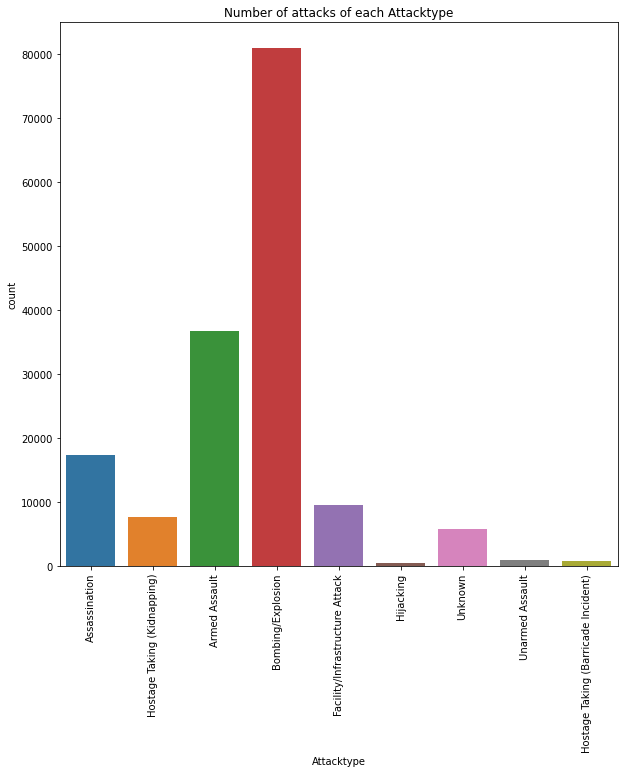

In [14]:
# Count of Terrorist Attack
plt.figure(figsize=(10,10))
sns.countplot(x='Attacktype',data=data)
plt.xticks(rotation=90)
plt.title('Number of attacks of each Attacktype')
plt.show()

In [16]:
# Year total - of attacks

year_attacks = data['Year'].value_counts(dropna = False).sort_index()
year_attacks




1970      569
1971      316
1972      224
1973      225
1974      344
1975      388
1976      598
1977     1076
1978     1237
1979     2087
1980     2011
1981     1779
1982     1542
1983     1700
1984     2492
1985     2196
1986     2261
1987     2834
1988     3408
1989     4101
1990     3627
1991     4294
1992     4794
1994     3130
1995     2870
1996     2784
1997     2767
1998      761
1999     1232
2000     1602
2001     1777
2002     1227
2003     1158
2004     1022
2005     1829
2006     2444
2007     2907
2008     4426
2009     4452
2010     4724
2011     4885
2012     8092
2013    11338
2014    14905
2015    13369
2016    12307
2017     9835
Name: Year, dtype: int64

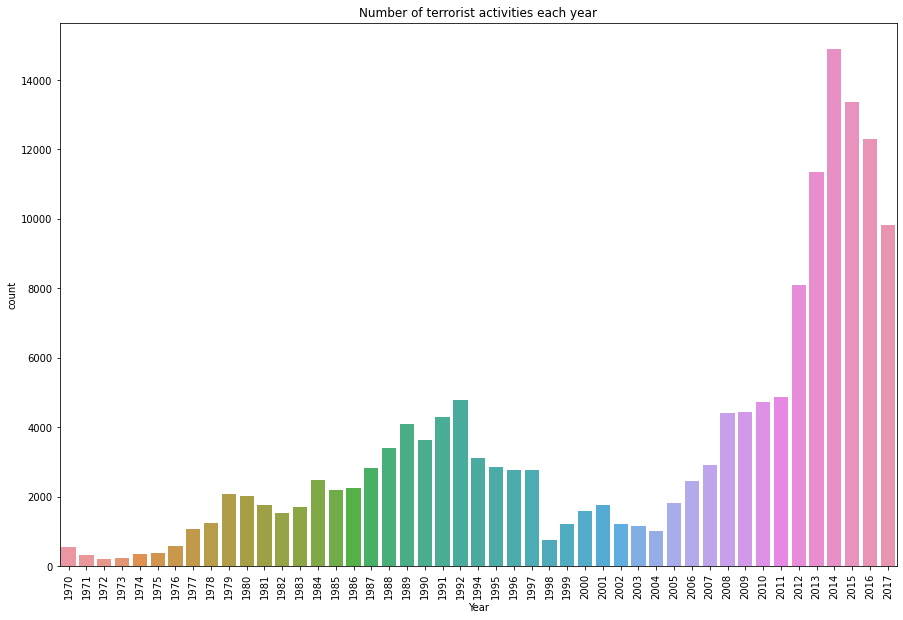

In [17]:
#Yearly Count of Terrorist Attack
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=data)
plt.xticks(rotation=90)
plt.title('Number of terrorist activities each year')
plt.show()

observation:2014  had the most attacks 

In [ ]:
#Region affected by terrorist attack
data['Month'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='Month',data=data)
plt.xticks(rotation=70)
plt.show()

Observation:Month 5 is the month that  passed  the most killed

In [19]:
#count attrak in country
countries = data.Country.value_counts().head(20)
countries

Iraq              23122
Pakistan          13798
Afghanistan       11716
India             11293
Colombia           7262
Philippines        6220
Peru               5091
Turkey             3964
Thailand           3528
El Salvador        3499
United Kingdom     3486
Somalia            3095
Spain              2870
Yemen              2860
Nigeria            2852
Sri Lanka          2758
United States      2698
Algeria            2470
France             2424
Egypt              2402
Name: Country, dtype: int64

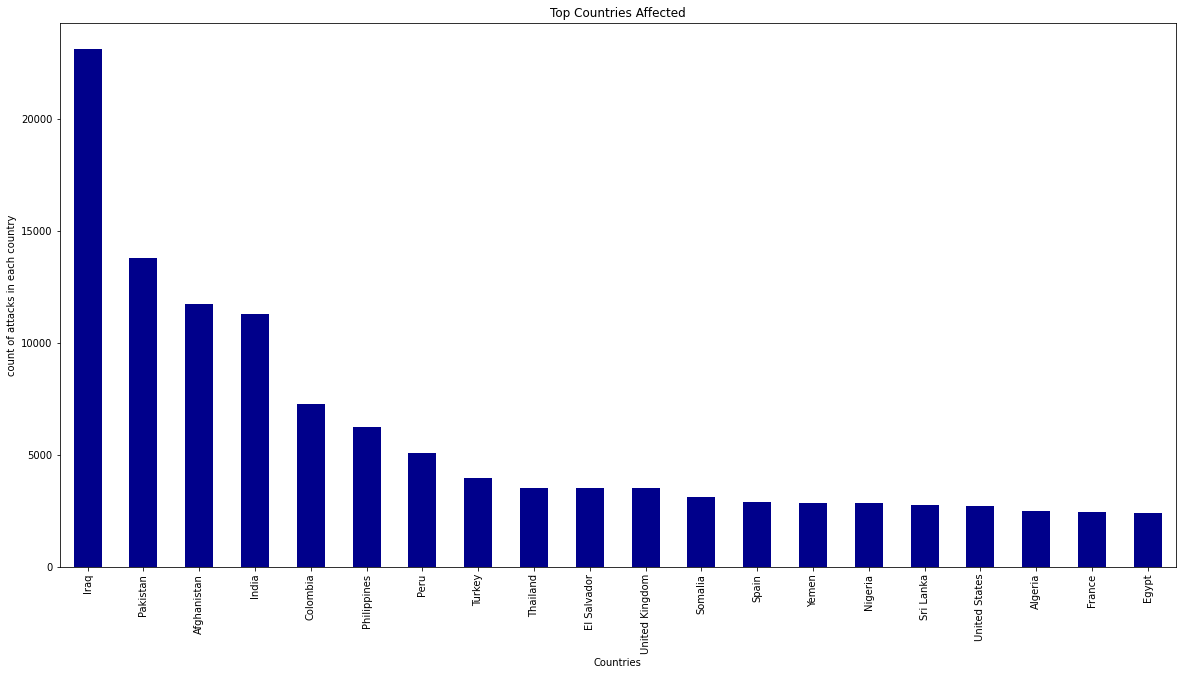

In [20]:
countries.plot(kind = "bar", color = "darkblue", figsize = (20,10))
plt.title("Top Countries Affected")
plt.xlabel("Countries")
plt.ylabel("count of attacks in each country")
plt.show()

Observation:Iraq is the month that  had  the most attracked

In [21]:
x = data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(20)
x

Country
Iraq             67734.0
Afghanistan      35614.0
Pakistan         22314.0
India            17455.0
Sri Lanka        13711.0
Colombia         12591.0
Nigeria          11507.0
Peru             10686.0
El Salvador      10405.0
Algeria           9318.0
Somalia           7833.0
Philippines       7522.0
Syria             7522.0
Yemen             6986.0
Nicaragua         6401.0
Turkey            6007.0
Guatemala         4669.0
Egypt             3821.0
United States     3764.0
Lebanon           3702.0
Name: Killed, dtype: float64

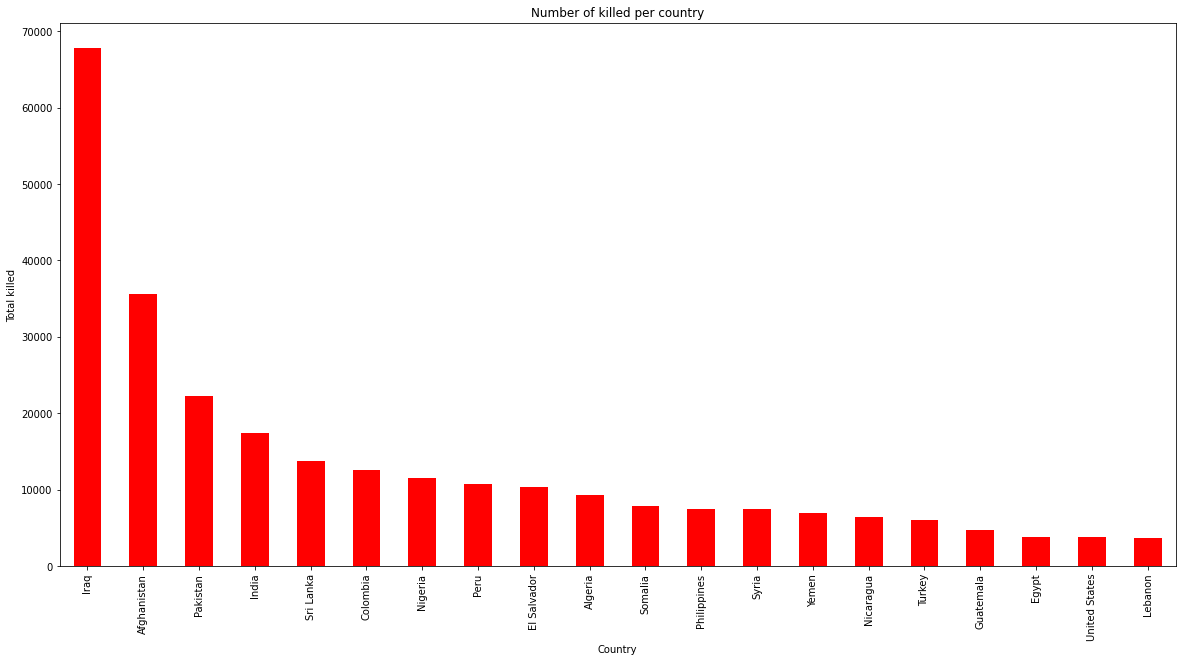

In [22]:
#Plot Killed Data

x.plot(kind = "bar", color = "red", figsize = (20,10))
plt.title("Number of killed per country")
plt.xlabel("Country")
plt.ylabel("Total killed")
plt.show()

Observation: Iraq is the country that has had the most killed

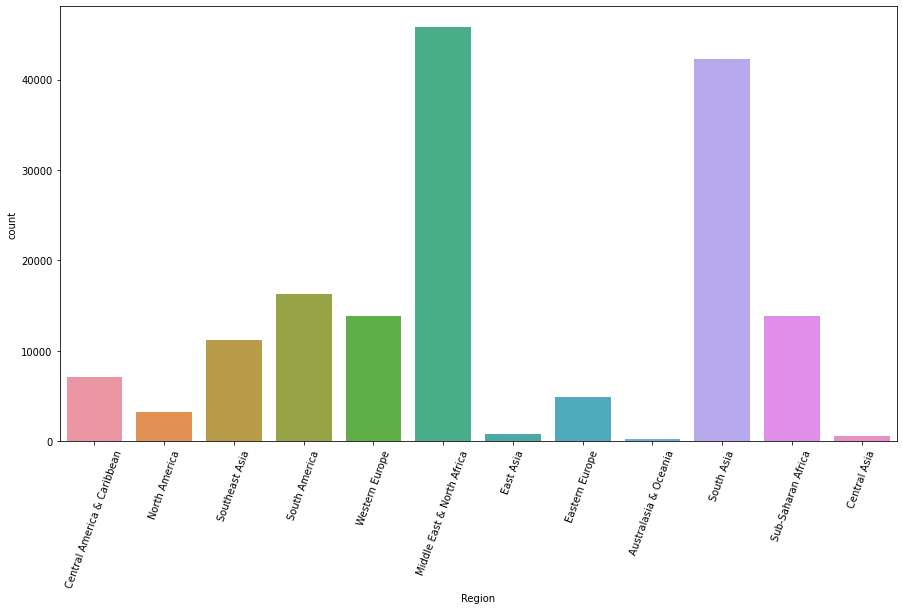

In [23]:
#Region affected by terrorist attack
data['Region'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='Region',data=data)
plt.xticks(rotation=70)
plt.show()

Observation: Middle East & North Africa is the region that has had the most attrack

In [24]:
#Citywise Killed

City_Kill = data[["City", "Killed"]].groupby("City").sum().sort_values(by ='Killed', ascending =False).head(10)
City_Kill

,Killed
City,
Baghdad,20062.0
Unknown,13931.0
Mosul,6568.0
Mogadishu,3659.0
Karachi,3510.0
New York City,2838.0
Kabul,2431.0
Beirut,1881.0
Ramadi,1852.0


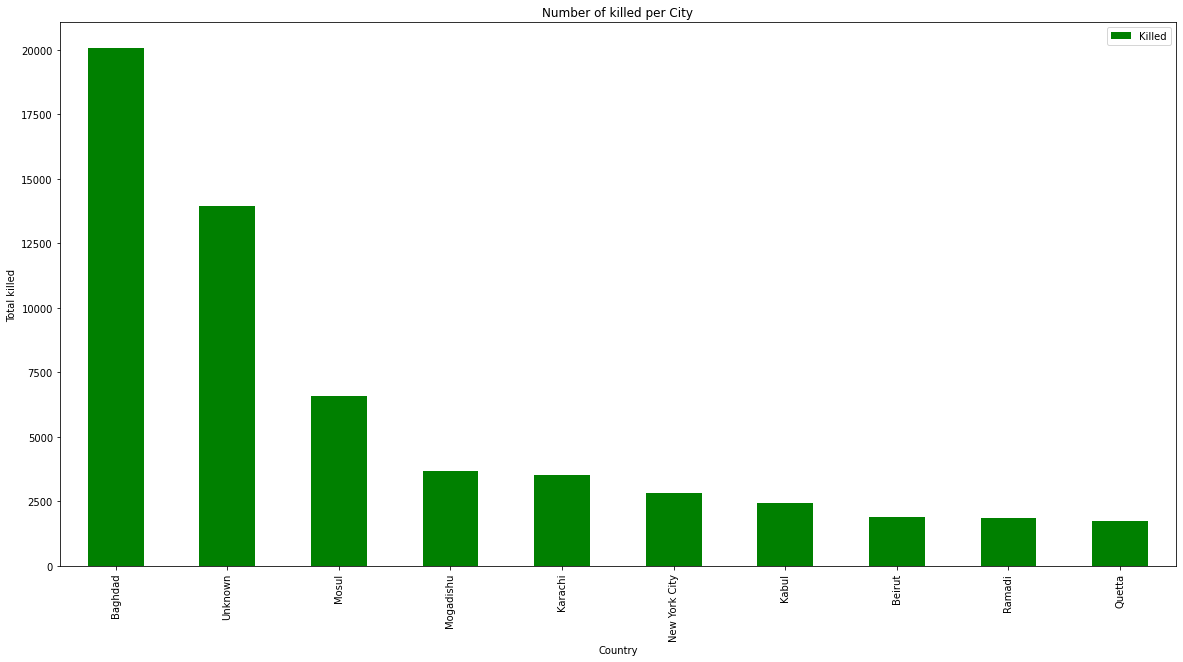

In [25]:
#Plot Killed Data

City_Kill.plot(kind = "bar", color = "green", figsize = (20,10))
plt.title("Number of killed per City")
plt.xlabel("Country")
plt.ylabel("Total killed")
plt.show()

Observation: Baghdad is the City that  had the most killed

In [26]:
#Region Killed

Region_Kill = data[["Region", "Killed"]].groupby("Region").sum().sort_values(by ='Killed', ascending =False).head(10)
Region_Kill

,Killed
Region,
Middle East & North Africa,113275.0
South Asia,91494.0
Sub-Saharan Africa,53225.0
South America,24522.0
Central America & Caribbean,22309.0
Southeast Asia,12573.0
Eastern Europe,6192.0
North America,4865.0
Western Europe,4556.0


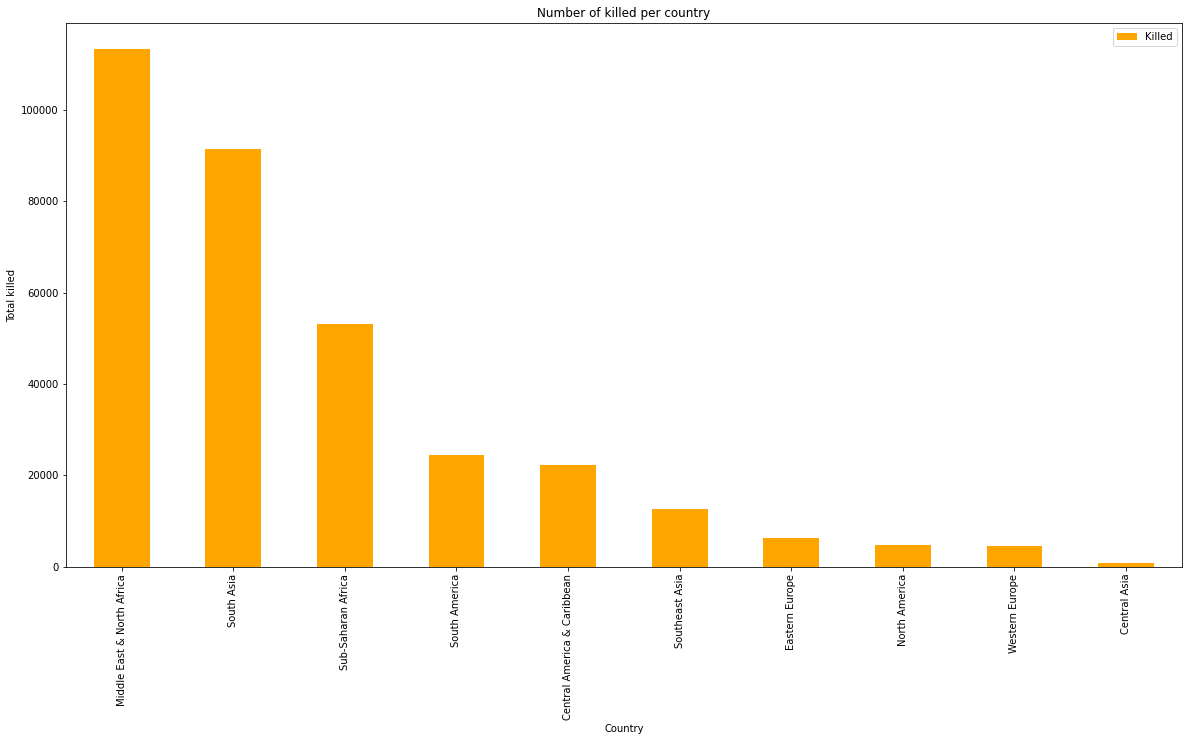

In [27]:
#Plot Killed Data

Region_Kill.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Number of killed per country")
plt.xlabel("Country")
plt.ylabel("Total killed")
plt.show()

Observation: Middle East & North Africa is the region that  had the most killed

In [28]:
Grp = data.Group.value_counts()[1:20]
Grp

Taliban                                             6784
Islamic State of Iraq and the Levant (ISIL)         4704
Shining Path (SL)                                   3761
New People's Army (NPA)                             2393
Al-Shabaab                                          2375
Farabundo Marti National Liberation Front (FMLN)    2248
Revolutionary Armed Forces of Colombia (FARC)       2179
Kurdistan Workers' Party (PKK)                      2130
Basque Fatherland and Freedom (ETA)                 1823
Communist Party of India - Maoist (CPI-Maoist)      1822
Boko Haram                                          1743
Irish Republican Army (IRA)                         1670
Maoists                                             1541
Liberation Tigers of Tamil Eelam (LTTE)             1470
National Liberation Army of Colombia (ELN)          1378
Tehrik-i-Taliban Pakistan (TTP)                     1302
Palestinians                                         916
Al-Qaida in the Arabian Peninsu

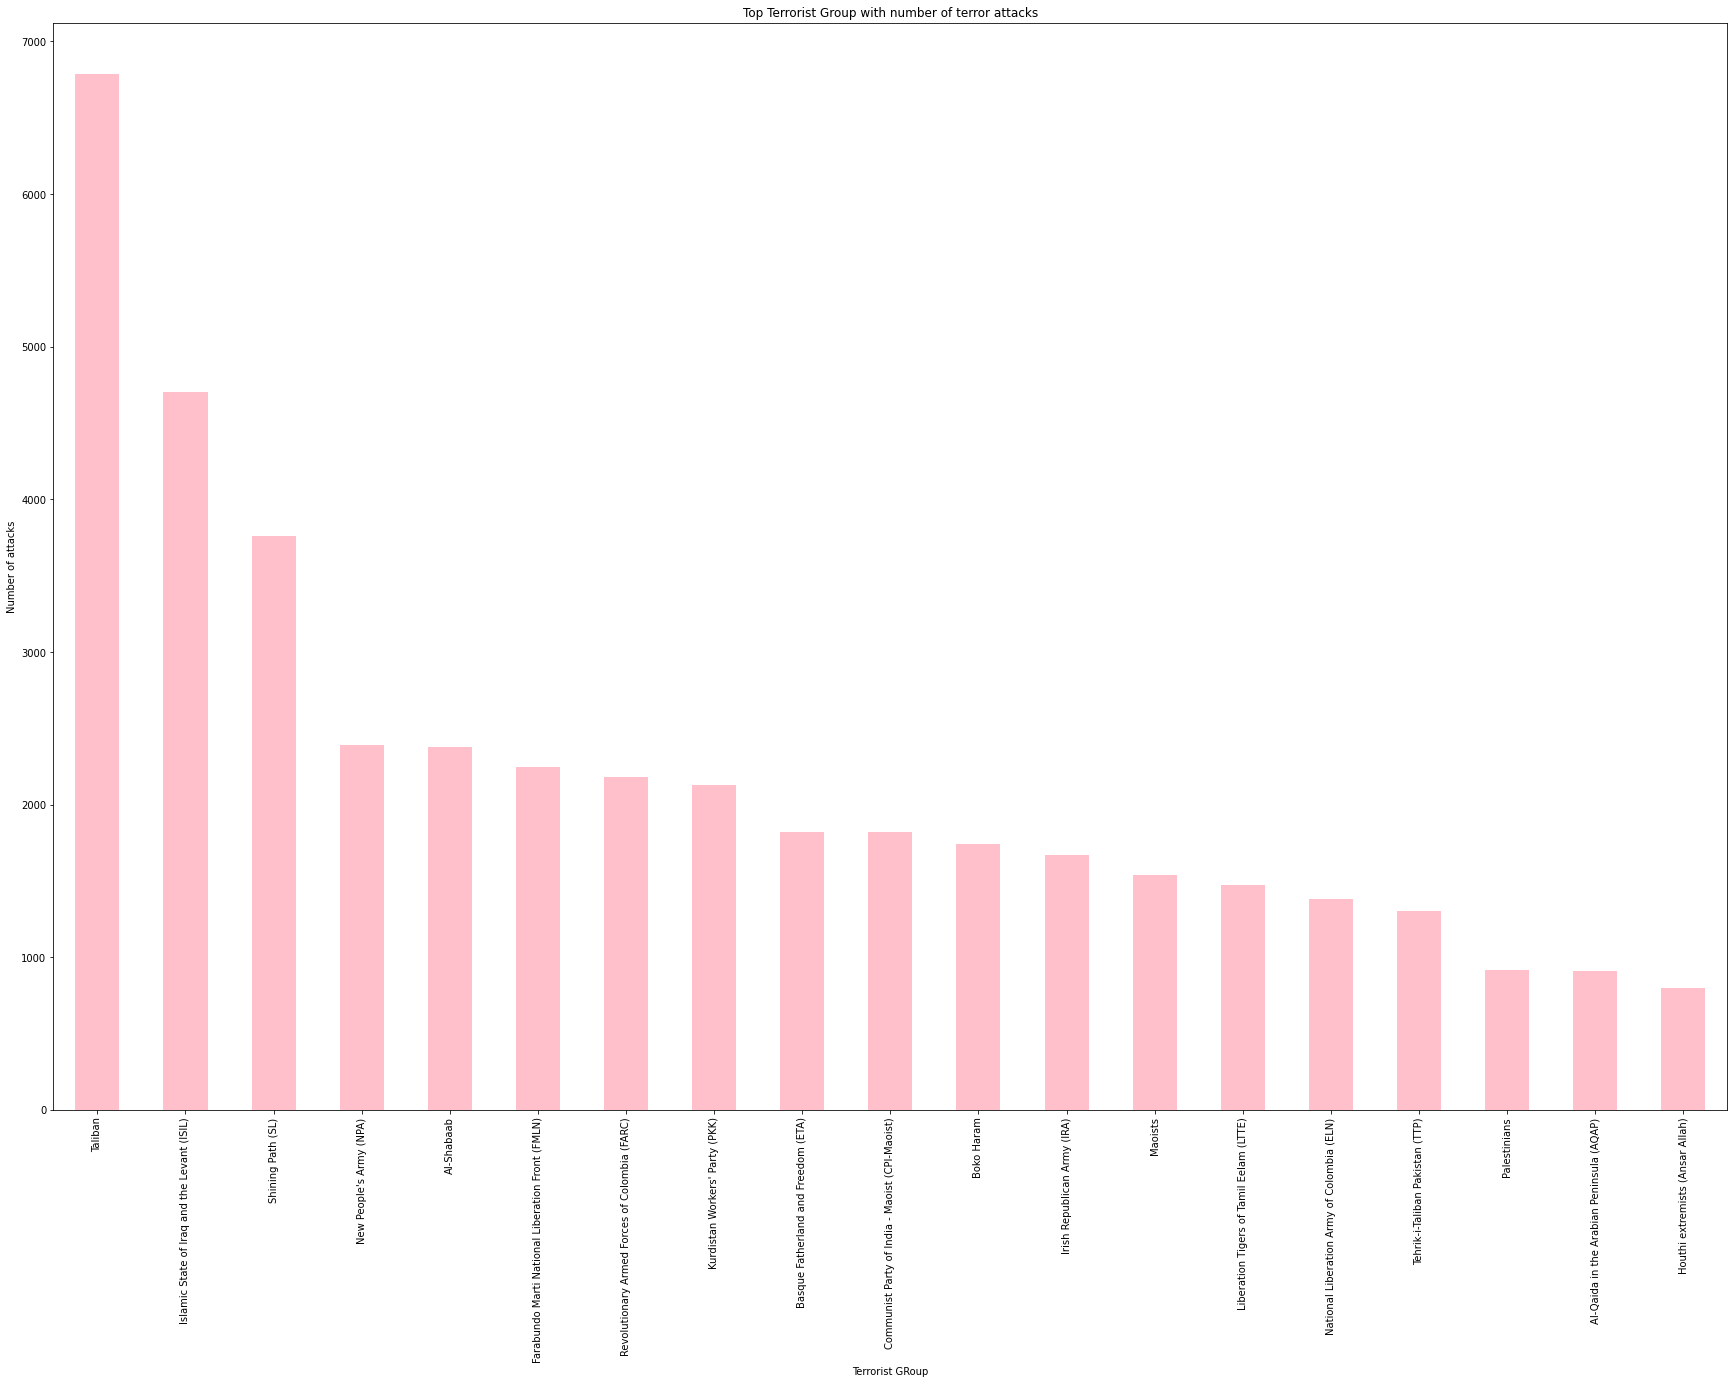

In [29]:
Grp.plot(kind = "bar", color = "pink", figsize = (30,20))
plt.title("Top Terrorist Group with number of terror attacks")
plt.xlabel("Terrorist GRoup")
plt.ylabel("Number of attacks")
plt.show()

# conclusion

In [30]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['City'].value_counts().idxmax()) 
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['Attacktype'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
